In [36]:
import pandas as pd
import numpy as np
from numpy.polynomial.polynomial import polyfit
import seaborn as sns
import matplotlib.pyplot as plt 
import glob
import re
%matplotlib inline

# Load Files
files = glob.glob('catching_data/catching*.csv')

# Create DataFrame and add column for Year
lst = []
year = 2008

for filename in files:
    df = pd.read_csv(filename)
    df['Year'] = year
    year += 1
    lst.append(df)

df = pd.concat(lst)
df = df[[df.columns.tolist()[-1].title()] + df.columns.tolist()[2:-1]]


In [37]:
# DataFrame with Framing Data
framing = df[['Year', 'Name', 'G', 'PA', 'Pitches', 'FrmCH', 'CSAA', 'FrmR']]
framing.head()

,Year,Name,G,PA,Pitches,FrmCH,CSAA,FrmR
0,2008,Yasmani Grandal,107,3633,13774.0,5902,0.034,28.3
1,2008,Francisco Cervelli,128,4644,17343.0,7576,0.021,22.6
2,2008,Derek Norris,128,4414,17351.0,7595,0.016,17.2
3,2008,Miguel Montero,109,3363,13012.0,5481,0.022,16.7
4,2008,Russell Martin,117,4144,15676.0,6623,0.022,20.4


In [38]:
central_stats = framing.groupby('Year').FrmR.describe().reset_index()
central_stats

,Year,count,mean,std,min,25%,50%,75%,max
0,2008,109.0,1.510092,7.107312,-14.7,-2.100,0.0,3.400,28.3
1,2009,105.0,1.365714,8.292522,-22.5,-2.300,0.0,3.800,27.3
2,2010,104.0,0.981731,6.569742,-17.8,-1.925,-0.1,2.225,26.1
3,2011,113.0,0.975221,6.068310,-18.3,-1.500,0.0,2.400,22.4
4,2012,116.0,1.231897,7.790045,-16.6,-1.900,0.0,3.075,30.7
5,2013,108.0,0.603704,8.485732,-23.0,-2.600,0.0,1.825,27.3
6,2014,113.0,0.006195,6.377559,-16.1,-2.300,-0.1,2.200,26.2
7,2015,112.0,0.536607,9.443926,-24.8,-2.500,0.0,3.050,40.7
8,2016,101.0,0.166337,1.586901,-5.0,-0.500,0.0,1.100,3.8
9,2017,108.0,-0.317593,8.152528,-46.2,-2.550,0.0,1.275,33.9


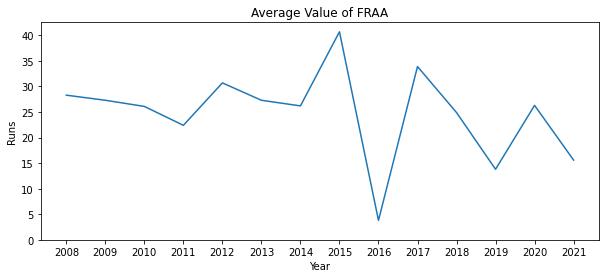

In [39]:
y_vals = central_stats['max'].tolist()

plt.figure(figsize=(10, 4))
ax = plt.subplot(1, 1, 1)
x_values = central_stats.Year.tolist()
plt.plot(x_values, y_vals)
plt.title("Average Value of FRAA")
plt.xlabel('Year')
plt.ylabel('Runs')
ax.set_xticks(x_values)
ax.set_yticks(range(0, 45, 5))
plt.savefig('framing.png', facecolor='White')
plt.show()

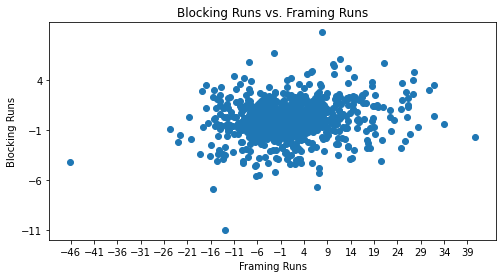

In [45]:
y_vals = df.BlkR.to_numpy()
x_vals = df.FrmR.to_numpy()
b, m = polyfit(x_vals, y_vals, 1)

plt.figure(figsize=(8, 4))
ax = plt.subplot(1, 1, 1)
plt.plot(x_vals, y_vals, 'o')
plt.plot(x_vals, b + x_vals * m, '-')
plt.title("Blocking Runs vs. Framing Runs")
plt.xlabel('Framing Runs')
plt.ylabel('Blocking Runs')
ax.set_xticks(range(int(df.FrmR.min()), int(df.FrmR.max()), 5))
ax.set_yticks(range(int(df.BlkR.min()), int(df.BlkR.max()), 5))
plt.savefig('run_comparison.png', facecolor = 'white')
plt.show()

In [47]:
x_vals = central_stats.Year.tolist()
y_vals = framing[framing.Year == 2008].FrmR.mode()

In [48]:
y_vals

0    0.0
dtype: float64